# 09 Softmax 回归 + 损失函数 + 图片分类数据集 + 损失函数 + 图片分类数据集

## P1_Softmax 回归

### 回归
- 单连续数值输出
- 自然区间 $R$
- 跟真实值的区别作为损失

### 分类
- 通常多个输出
- 输出 $i$ 是预测为第 $i$ 类的置信度

###  对于 Softmax 函数形式为什么设置为 exp:

在其同交叉熵损失函数求导时, 要着重理解导数的含义: 其本质同线性回归一样, 代表的都是预测同真实值的差距. 因此, 让梯度的导数为 0, 其实就是让两者的差距尽可能地小. 其中求导的具体步骤可以参看: softmax及其导数.

## P2_损失函数

可以通过图像观察损失函数,似然函数以及导数的关系, 其中往往令 $y = 0$. 即固定$y$观察预测值 $y'$ 的值来检查该损失函数是否有效果.

- L2 Loss:$\quad l(y,y')=\frac{1}{2}(y-y')^2$
- L1 Loss:$\quad l(y,y')=|y-y'|$
- Huber's Robust Loss :
\begin{equation}
    l(y,y')~=~\left\{
    \begin{aligned}
    |y-y'|-\frac{1}{2},&\quad if~|y-y'|>1\\
    \frac{1}{2}(y-y')^2,&\quad otherwise  
    \end{aligned}
    \right.
\end{equation}

## P3_ 图片分类数据集


对 show_images 函数的解释:[备注: 这里使用 d2l.plt 与直接调用 plt 等价, 两函数相同, 下述中我们对 plt 模块进行解释]

- ### plt.subplot(), plt.subplots() 函数

 #### 1. 两函数简介

subplot(), subplots() 均用于Matplotlib 绘制多图. subplots 一次性创建并返回所有的子图和其 axe 对象. subplot则是分开多次添加子图, 每次调用返回一个子图和对应的 ax 对象.

我们首先来看常用代码:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig-------即 figure, 画窗

ax-------即 axex, 画窗中创建的笛卡尔坐标区

其就等价于下述代码:

In [ ]:
fig = plt.figure()#首先调用 plt.figure() 创建了一个 **画窗对象fig** 
ax = fig.add_subplot(111)#然后再对 fix 创建默认的坐标区（一行一列一个坐标区）
#这里的（111）相当于（1，1，1），当然，官方有规定，当子区域不超过9个的时候，我们可以这样简写

#### 总计

subplot()、subplots()在实际过程中，先创建了一个figure画窗，然后通过调用add_subplot()来向画窗中各个分块添加坐标区，其差别在于是分次添加(subplot())还是一次性添加(subplots())

利用 matplotlib 绘图一些参数的运用中每一项的具体含义:
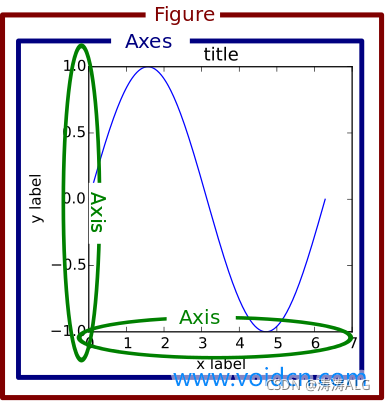

因此, 我们设置好figure后, 只需要设置对axes进行操作就可以进行绘图了
#### 2. plt.subplot() 函数常用参数
```python
subplot(nrows, ncols, index, **kwargs)
```
一般我们只用到前三个参数，将整个绘图区域分成 nrows 行和 ncols 列，而index用于对子图进行编号.

In [ ]:
# 如图中，创建了一个1x2的subplot对象，即两块绘制区域，当我们在每个区域进行绘制时，需要使用参数来制定绘制区域，即使用第三个参数index
import matplotlib.pyplot as plt
import numpy as np

# plot 1:
xpoints = np.array([0, 6])
ypoints = np.array([0, 100])

plt.subplot(1, 2, 1)
plt.plot(xpoints,ypoints)
plt.title("plot 1")

# plot 2:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

plt.subplot(1, 2, 2)
plt.plot(x,y)
plt.title("plot 2")

plt.suptitle("RUNOOB subplot Test")
plt.show()

#### 3. plt.subplots() 常用参数

```python
matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False,
                           squeeze=True,subplot_kw=None, gridspec_kw=None, **fig_kw)
```
- nrows: 默认为 1, 设置图表的行数.

- ncols: 默认为 1, 设置图表的列数.
-sharex、sharey: 设置 x, y 轴是否共享属性, 默认为 False，可设置为 'none'、'all'、'row' 或 'col'. 
  - False 或 none: 每个子图的 x 轴或 y 轴都是独立的,
  - True 或 'all': 所有子图共享 x 轴或 y 轴,
  - 'row': 设置每个子图行共享一个 x 轴或 y 轴, 
  - 'col': 设置每个子图列共享一个 x 轴或 y 轴.

#### 返回值
设置好 figture, axes 的空图片, 后续若需要画图需要对 axes 进行操作.

实例:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一些测试数据 
x = np.linspace(0,100, 4)
y = np.sin(x**2)

# 创建一个画像和子图 -- 图1
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# 创建两个子图 -- 图2
#如图figure2，四个子图中上两幅图并无x轴（与下子图共享），因为已设置sharex=True
#若改为sharey=True，可观察到四副子图中右两幅无y轴（即与左子图共享）
f, ([ax1, ax2],[ax3,ax4]) = plt.subplots(2, 2, sharex=True)
ax1.plot(x, y)
ax1.set_title('Sharing x axis')
ax2.scatter(x, y)
ax3.scatter(x, y)
ax4.scatter(x, y)

# 创建四个子图 -- 图3
#通过对subplot_kw传入参数，生成关于极坐标系的子图
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

plt.show()

- ### plt.subplots 中的 ax = ax.flatten() 的说明

在用plt.subplots画多个子图中，ax = ax.flatten()将 ax 由 n * m 的Axes组展平成1 * nm 的 Axes 组.

以下面的例子说明 ax = ax.flatten() 的作用:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image = np.random.randn(4, 28, 28) #  生成随机数

fig, ax = plt.subplots(nrows=2,ncols=2,sharex='all',sharey='all')
ax = ax.flatten()  


for i in range(4):
    img = image[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')  # 区别：可以直接用ax[i]

如果不使用 ax = ax.flatten():

In [2]:
image = np.random.randn(4, 28, 28) #  生成随机数

fig, ax = plt.subplots(nrows=2,ncols=2,sharex='all',sharey='all') 

ax[0, 0].imshow(image[0], cmap='Greys', interpolation='nearest')  # 区别：不能直接使用ax[i]
ax[0, 1].imshow(image[1], cmap='Greys', interpolation='nearest')
ax[1, 0].imshow(image[2], cmap='Greys', interpolation='nearest')
ax[1, 1].imshow(image[3], cmap='Greys', interpolation='nearest')

NameError: name 'np' is not defined

- ### numpy 中同样有 flatten() 方法

这里与axe用法类似, 不论多高维度的数组，都可以直接展成维度为 1 的向量, 按行展开, 最后得到 shape 为 (1,). 

#### 实例

In [9]:
import numpy as np

a = np.arange(0, 100).reshape((2, 5, 10))
print(a)
print(a.shape)
b = a.flatten()
print(b)
print(b.shape)

# 小技巧, 将向量转化为矩阵, 其中矩阵有维度为 (len(向量),1)
c = b[:,None]
print(c)
print(c.shape)

[[[ 0  1  2  3  4  5  6  7  8  9]
  [10 11 12 13 14 15 16 17 18 19]
  [20 21 22 23 24 25 26 27 28 29]
  [30 31 32 33 34 35 36 37 38 39]
  [40 41 42 43 44 45 46 47 48 49]]

 [[50 51 52 53 54 55 56 57 58 59]
  [60 61 62 63 64 65 66 67 68 69]
  [70 71 72 73 74 75 76 77 78 79]
  [80 81 82 83 84 85 86 87 88 89]
  [90 91 92 93 94 95 96 97 98 99]]]
(2, 5, 10)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(100,)
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [

- ### zip() 函数说明

用于将可迭代的对象作为参数, 将对象中对应的元素打包成一个个元组, 然后返回由这些元组组成的列表. 值得说明的一点是该函数在 Python 不同版本中表现并不相同, 这里只对 Python(3.0+) 进行解释.

#### 实例1

In [30]:
a = [1, 2, 3]
b = [4, 5, 6]
c = [4, 5, 6, 7, 8]
zipped = zip(a, b) # 返回一个对象, 是一个迭代器
print(zipped)

#  for 循环可以将其输出
for i in zipped:
    print(i)

print(list(zipped)) # for 完以后为空, 不 for 正常
print(list(zip(a,c))) # 元素个数与最短的列表一致
print('-'*50)

a1, a2 = zip(*zip(a,b)) # 与 zip 相反，zip(*) 可理解为解压，返回二维矩阵式
print(list(a1))
print(list(a2))

(1, 4)
(2, 5)
(3, 6)
[]
[(1, 4), (2, 5), (3, 6)]
--------------------------------------------------
[1, 2, 3]
[4, 5, 6]


#### 实例2

In [93]:
a = [[1], [2], [3]]
b = [[4], [5], [6]]

for i in zip(a, b):
    print(i)

([1], [4])
([2], [5])
([3], [6])


## P_4 Softmax 从零开始实现

- ### isinstance() 函数的使用说明

isinstance() 函数名称直译过来是:是实例, 也就是判断是不是实例的一个函数, 即用来判断一个对象是否是一个已知的类型, 类似 type().

#### 常用参数
```python
isinstance(object, classinfo)
```
- object -- 实例对象
- classinfo -- 可以是直接或间接类名、基本类型或者由它们组成的元组.

#### 返回值
如果对象的类型与参数二的类型 (classinfo) 相同则返回 True, 否则返回 False.

#### 实例

In [13]:
a = 2
isinstance(a, int)

True

In [15]:
isinstance(a, str)

False

In [17]:
isinstance(a, (str, int, list)) # 是元组其中一个就返回 True.

True

- ### isinstance() 与 type() 的区别
    - type() 不会认为子类是一种父类类型，不考虑继承关系
    - isinstance() 会认为子类是一种父类类型，考虑继承关系
    
如果要判断两个类型是否相同推荐使用 isinstance().

实例

In [20]:
class A:
    pass
 
class B(A):
    pass
 
isinstance(A(), A)    # returns True

True

In [21]:
type(A()) == A        # returns True

True

In [22]:
isinstance(B(), A)    # returns True

True

In [31]:
type(B()) == A        # returns False, 这是因为 type 认为继承并不相同

False

In [38]:
print([0.0] * 10)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


- ### 变量名称.numel()函数

针对于 Tensor 的一个函数.(实测ndarray, list, tuple 都没有该 attribute)

可以将该函数名当作 number element 的缩写, 该函数可以得到 Tensor 中每个元素的个数, 即使高维的矩阵也可以得到元素的个数. 

#### 实例

In [50]:
import torch
import numpy as np

y = torch.Tensor([1, 2, 3, 4])
print(y)
print(y.numel())

y = torch.Tensor([1, 2, 3, 4]).reshape(2, 2)
print(y)
print(y.numel())

y = torch.Tensor([1, 2, 3, 4]).reshape(2, 2, 1)
print(y)
print(y.numel())

tensor([1., 2., 3., 4.])
4
tensor([[1., 2.],
        [3., 4.]])
4
tensor([[[1.],
         [2.]],

        [[3.],
         [4.]]])
4


- ### Accumulator类定义的说明:

#### 源码

In [53]:
class Accumulator:
    #在n个变量上累加
    def __init__(self, n):
        self.data = [0.0] * n
        
    def add(self, *args):
        self.data = [a + float(b) for a,b in zip(self.data, args)]
 
    def reset(self):
        self.data = [0.0] * len(self.data)
 
    def __getitem__(self, idx):
        return self.data[idx]

#### 方法说明
- init 方法: 初始化的时候会根据传进来的n的大小来创建n个空间，且初始化全部为0.0.
- add 方法: add() 的时候情况下, 虽然 *args 代表这里可以传入任意个参数, 但是因为要和初始化的个数相同不然要报错. 
```python
a + float(b) for a,b in zip(self.data,args)
``` 
是把原来类中对应位置的 data 和新传入的 args 做 a + float(b) 加法操作然后重新赋给该位置的 data, 从而达到累加器的累加效果.
- reset 方法: 重新设置空间大小并初始化.
- getitem 方法: 实现类似数组的取的操作

#### 实例

In [55]:
class Accumulator:
    #在n个变量上累加
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        for a, b in zip(self.data, args):
            print(a, b)
        self.data = [a + float(b) for a,b in zip(self.data, args)]
 
    def reset(self):
        self.data = [0.0] * len(self.data)
 
    def __getitem__(self, idx):
        return self.data[idx]
 
metric = Accumulator(3)
print(metric[1])
metric.add(3,6,9)
print(metric[1])
metric.add(1,2)
print(metric[1])

0.0
0.0 3
0.0 6
0.0 9
6.0
3.0 1
6.0 2
8.0


- ### d2l 中 set_axes 函数说明:

该函数设置图片的 x, y 轴的标签, 范围, 类型, 图的标题等 

#### 源码 [较为简单, 看注释即可]

In [61]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib.
      Defined in :numref:`sec_calculus`"""

    axes.set_xlabel(xlabel) # 设置 x 轴标签, y 轴类似
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale) # 设置 x 轴类型, 默认'linear', y 轴类似, 其中待选参数有 {"linear", "log", "symlog", "logit", ...} 或 ScaleBase
    axes.set_yscale(yscale) # 如果保持 x 轴为正常线性, y 为'log', 则绘制 log 函数图像
    axes.set_xlim(xlim)
    axes.set_ylim(ylim) # 设置 y 轴范围, x 轴类似
    if legend:
        axes.legend(legend) # 设置图例
    axes.grid() # 设置网格线

下面列举一个关于 xcale 的实例

#### 实例

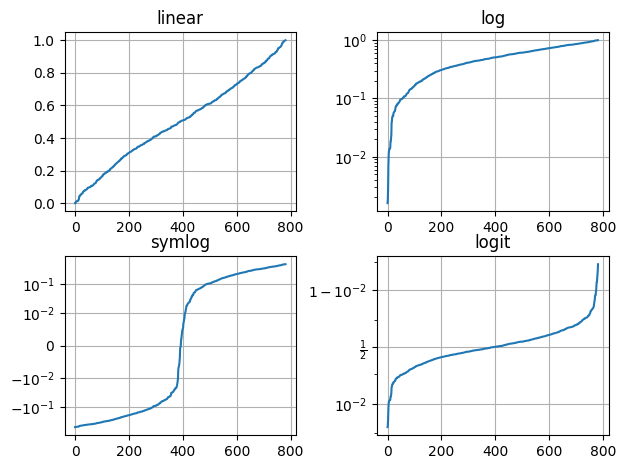

In [77]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19880801)

# 构造数据，要求数据都在0-1之间，否则不能设置logit缩放类型
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))


# linear，默认缩放类型
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

- ### lambda 函数的说明
详细 @ 收藏

#### 常用参数
```python
lambda [arg1 [,arg2,.....argn]]:expression
```
lambda 是 Python 预留的关键字，[arg…] 和 expression 由用户自定义

#### 实例1

In [81]:
lambda x, y: x*y # 函数输入是x和y，输出是它们的积x*y
lambda:None # 函数没有输入参数，输出是None
lambda *args: sum(args) # 输入是任意个数参数，输出是它们的和(隐性要求输入参数必须能进行算术运算)
lambda **kwargs: 1 # 输入是任意键值对参数，输出是1

<function __main__.<lambda>(**kwargs)>

#### 实例2

<function <lambda> at 0x00000216C024F9D8>


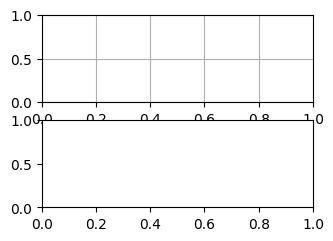

In [82]:
from d2l import torch as d2l 

fig, axes = d2l.plt.subplots(2,1, figsize=(3.5, 2.5))
axes.flatten()
a = lambda: d2l.set_axes(
            axes[0], None, None, None, None, 'linear', 'linear', None)
print(a)
a()

- ### Python hasattr() 函数

用于判断对象是否包含对应的属性, 是 has attribute 的缩写

#### 语法
```python
hasattr(object, name)
```

#### 参数
- object: 对象
- name: 字符串，属性名

#### 返回值
如果对象有该属性返回 True，否则返回 False.

#### 实例

In [94]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
 
class Coordinate:
    x = 10
    y = -5
    z = 0
 
point1 = Coordinate() 
print(hasattr(point1, 'x'))
print(hasattr(point1, 'y'))
print(hasattr(point1, 'z'))
print(hasattr(point1, 'no'))  # 没有该属性

True
True
True
False


- ### assert 函数

#### 介绍
Python assert(断言)用于判断一个表达式, 在表达式条件为 false 的时候触发异常.

断言可以在条件不满足程序运行的情况下直接返回错误, 而不必等待程序运行后出现崩溃的情况, 例如我们的代码只能在 Linux 系统下运行, 可以先判断当前系统是否符合条件.

#### 语法

```python
assert expression
```
等价于:
```python
if not expression:
    raise AssertionError
```

assert 后面也可以紧跟参数:
```python
assert expression [, arguments]
```
等价于:
```python
if not expression:
    raise AssertionError(arguments)
```

#### 实例

In [99]:
assert True

In [101]:
assert False

AssertionError: 

In [104]:
assert 1==1

In [106]:
assert 1==2

AssertionError: 

In [109]:
assert 1==2,'1 不等于 2'

AssertionError: 1 不等于 2